In [40]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import GraphHelpers as GH
import ETFunctions as et
import MathsUtilities as MUte
import math

## Bring in the data needed

In [41]:
root = 'C:\GitHubRepos\CropWaterAnalysis'

In [42]:
#Bring in fPAR (estimated from NDVI and interpolated to daily values) for each plot
WheatfPAR = pd.concat([pd.read_pickle(root+'\Wheat\DataFrames\SplicedfPAR.pkl')],axis=1,keys=['Wheat'],names =['Crop'])
FodderBeetfPAR = pd.concat([pd.read_pickle(root+'\FodderBeet\DataFrames\SplicedfPAR.pkl')],axis=1,keys=['FodderBeet'],names =['Crop'])
LucernefPAR = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\LucDailyfPAREstInt.pkl')
RyegrassfPAR = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\RyeDailyfPAREstInt.pkl')
OatsfPAR = pd.concat([pd.read_pickle(root+'\Oats\DataFrames\SplicedfPAR.pkl')],axis=1,keys=['Oats'],names =['Crop'])
#Note Barley fPAR uses values from scalled NDVI because measurements were not availalbel for all 24 plots.
BarleyfPAR = pd.concat([pd.read_pickle(root+'\Barley\DataFrames\DailyGreenFPAREstInt.pkl')],axis=1,keys=['Barley'],names =['Crop'])
fPAR = pd.concat([WheatfPAR,FodderBeetfPAR,LucernefPAR,RyegrassfPAR,OatsfPAR,BarleyfPAR],axis=1)
fPAR.dropna(how='all',inplace=True)
GH.SortFrame(fPAR)

In [43]:
#Bring in surface temperature for each plot and join up
WheatTs = pd.concat([pd.read_pickle(root+'\Wheat\DataFrames\DailyTs.pkl')],axis=1,keys=['Wheat'],names=['Crop'])
FodderBeetTs = pd.concat([pd.read_pickle(root+'\FodderBeet\DataFrames\DailyTs.pkl')],axis=1,keys=['FodderBeet'],names=['Crop'])
LucerneTs = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\LucDailyTs.pkl')
RyegrassTs = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\RyeDailyTs.pkl')
OatsTs = pd.concat([pd.read_pickle(root+'\Oats\DataFrames\DailyTs.pkl')],axis=1,keys=['Oats'],names=['Crop'])
BarleyTs = pd.concat([pd.read_pickle(root+'\Barley\DataFrames\DailyTs.pkl')],axis=1,keys=['Barley'],names=['Crop'])
Ts = pd.concat([WheatTs,FodderBeetTs,LucerneTs,RyegrassTs,OatsTs,BarleyTs],axis=1)
GH.SortFrame(Ts)
Ts.dropna(how='all',inplace=True)
Ts.drop_duplicates(inplace=True)

In [44]:
#Bring in air temperature data for each experiment
WheatTa = pd.read_pickle(root+'\Wheat\DataFrames\DailyTa.pkl')
FodderBeetTa = pd.read_pickle(root+'\FodderBeet\DataFrames\DailyTa.pkl')
LandPTa = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\DailyTa.pkl')
OatsTa = pd.read_pickle(root+'\Oats\DataFrames\DailyTa.pkl')
BarleyTa = pd.read_pickle(root+'\Barley\DataFrames\DailyTa.pkl')
Ta = pd.concat([WheatTa,FodderBeetTa,LandPTa,OatsTa,BarleyTa])
Ta.dropna(how='all',inplace=True)
Ta.drop_duplicates(inplace=True)
GH.SortFrame(Ta.reindex(fPAR.columns,axis=1))

In [45]:
#Bring in solar radiation data for each experiment
WheatRs = pd.read_pickle(root+'\Wheat\DataFrames\DailyRs.pkl')
FodderBeetRs = pd.read_pickle(root+'\FodderBeet\DataFrames\DailyRs.pkl')
LandPRs = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\DailyRs.pkl')
OatsRs = pd.read_pickle(root+'\Oats\DataFrames\DailyRs.pkl')
BarleyRs = pd.read_pickle(root+'\Barley\DataFrames\DailyRs.pkl')
Rs = pd.concat([WheatRs,FodderBeetRs,LandPRs,OatsRs,BarleyRs])
Rs.dropna(how='all',inplace=True)
Rs.drop_duplicates(inplace=True)
GH.SortFrame(Rs.reindex(fPAR.columns,axis=1))

In [46]:
#Bring in vapour pressure deficit for each experiment
WheatEd = pd.read_pickle(root+'\Wheat\DataFrames\DailyEd.pkl')
FodderBeetEd = pd.read_pickle(root+'\FodderBeet\DataFrames\DailyEd.pkl')
LandPEd = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\DailyEd.pkl')
OatsEd = pd.read_pickle(root+'\Oats\DataFrames\DailyEd.pkl')
BarleyEd = pd.read_pickle(root+'\Barley\DataFrames\DailyEd.pkl')
Ed = pd.concat([WheatEd,FodderBeetEd,LandPEd,OatsEd,BarleyEd])
Ed.dropna(how='all',inplace=True)
Ed.drop_duplicates(inplace=True)
GH.SortFrame(Ed)

In [47]:
#Bring in vapour pressure deficit for each experiment
WheatEa = pd.read_pickle(root+'\Wheat\DataFrames\DailyEa.pkl')
FodderBeetEa = pd.read_pickle(root+'\FodderBeet\DataFrames\DailyEa.pkl')
LandPEa = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\DailyEa.pkl')
OatsEa = pd.read_pickle(root+'\Oats\DataFrames\DailyEa.pkl')
BarleyEa = pd.read_pickle(root+'\Barley\DataFrames\DailyEa.pkl')
Ea = pd.concat([WheatEa,FodderBeetEa,LandPEa,OatsEa,BarleyEa])
Ea.dropna(how='all',inplace=True)
Ea.drop_duplicates(inplace=True)
GH.SortFrame(Ea)

In [48]:
#Bring in Wind data for each experiment
Wheatu = pd.read_pickle(root+'\Wheat\DataFrames\Dailyu.pkl')
FodderBeetu = pd.read_pickle(root+'\FodderBeet\DataFrames\Dailyu.pkl')
LandPu = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\Dailyu.pkl')
Oatsu = pd.read_pickle(root+'\Oats\DataFrames\Dailyu.pkl')
Barleyu = pd.read_pickle(root+'\Barley\DataFrames\Dailyu.pkl')
u = pd.concat([Wheatu,FodderBeetu,LandPu,Oatsu,Barleyu])
u.dropna(how='all',inplace=True)
#u.drop_duplicates(inplace=True)
GH.SortFrame(u)

In [49]:
#Bring in net radiatin for each experiment
WheatRn = pd.concat([pd.read_pickle(root+'\Wheat\DataFrames\DailyRn.pkl')],axis=1,keys=['Wheat'],names=['Crop'])
FodderBeetRn = pd.concat([pd.read_pickle(root+'\FodderBeet\DataFrames\DailyRn.pkl')],axis=1,keys=['FodderBeet'],names=['Crop'])
LucRn = pd.concat([pd.read_pickle(root+'\LucerneAndPasture\DataFrames\LucDailyRn.pkl')],axis=1,keys=['Lucerne'],names=['Crop'])
RyeRn = pd.concat([pd.read_pickle(root+'\LucerneAndPasture\DataFrames\RyeDailyRn.pkl')],axis=1,keys=['Ryegrass'],names=['Crop'])
OatsRn = pd.concat([pd.read_pickle(root+'\Oats\DataFrames\DailyRn.pkl')],axis=1,keys=['Oats'],names=['Crop'])
BarleyRn = pd.concat([pd.read_pickle(root+'\Barley\DataFrames\DailyRn.pkl')],axis=1,keys=['Barley'],names=['Crop'])
Rn = pd.concat([WheatRn,FodderBeetRn,LucRn,RyeRn,OatsRn,BarleyRn],axis=1)
Rn.dropna(how='all',inplace=True)
Rn.drop_duplicates(inplace=True)
GH.SortFrame(Rn)

In [50]:
#Bring in potential Evapotranspiration data from Broadfields station
PET = pd.read_pickle(root+'\General\BroadfieldsMet\BroadFieldsPET.pkl')

In [51]:
def CleanWUData(DataToClean):
    upperRatio = 1.5
    lowerRatio = 0.01
    WURatio = DataToClean.copy()
    for row in WURatio.index:
        WURatio.loc[row,:] = np.divide(WURatio.loc[row,:].values,
                                      -1*PET.loc[row].values)
    CleanData = DataToClean.copy()
    CleanData.where(WURatio<upperRatio,np.nan,inplace=True)
    CleanData.where(WURatio>lowerRatio,np.nan,inplace=True)
    WURatio.where(WURatio<upperRatio,np.nan,inplace=True)
    WURatio.where(WURatio>lowerRatio,np.nan,inplace=True)
    WURatio.fillna(method='backfill',inplace=True)
    EstimatedData = WURatio.copy()
    for row in EstimatedData.index:
        EstimatedData.loc[row,:] = np.multiply(WURatio.loc[row,:].values,
                                      -1*PET.loc[row].values)
    
    for col in CleanData.columns:
        for row in CleanData.index:
            if math.isnan(CleanData.loc[row,col]):
                CleanData.loc[row,col] = EstimatedData.loc[row,col]
    return(CleanData)

In [52]:
#Bring in soil water use data.
LucWU = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\LucEstDailyWU.pkl')
LucWU = CleanWUData(LucWU)

RyeWU = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\RyeEstDailyWU.pkl')
RyeWU = CleanWUData(RyeWU)

WheatDaylightIndex = np.load(root+'\Wheat\DataFrames\DaylightIndex.npy')
WheatHourlyWU = pd.read_pickle(root+'\Wheat\DataFrames\HourlyWUmm.pkl')
WheatWU = pd.concat([WheatHourlyWU.reindex(WheatDaylightIndex).resample('d').sum()],axis=1,keys=['Wheat'],names=['Crop'])
WheatWU = CleanWUData(WheatWU)

FodderBeetDaylightIndex = np.load(root+'\FodderBeet\DataFrames\DaylightIndex.npy')
FodderBeetHourlyWU = pd.read_pickle(root+'\FodderBeet\DataFrames\HourlyWUmm.pkl')
FodderBeetWU = pd.concat([FodderBeetHourlyWU.reindex(FodderBeetDaylightIndex).resample('d').sum()],axis=1,keys=['FodderBeet'],names=['Crop'])
FodderBeetWU = CleanWUData(FodderBeetWU)

OatsDaylightIndex = np.load(root+'\Oats\DataFrames\DaylightIndex.npy')
OatsHourlyWU = pd.read_pickle(root+'\Oats\DataFrames\HourlyWUmm.pkl')
OatsWU = pd.concat([OatsHourlyWU.reindex(OatsDaylightIndex).resample('d').sum()],axis=1,keys=['Oats'],names=['Crop'])
OatsWU = CleanWUData(OatsWU)

BarleyDaylightIndex = np.load(root+'\Barley\DataFrames\DaylightIndex.npy')
BarleyHourlyWU = pd.read_pickle(root+'\Barley\DataFrames\HourlyWUmm.pkl') 
BarleyWU = pd.concat([BarleyHourlyWU.reindex(BarleyDaylightIndex).resample('d').sum()],axis=1,keys=['Barley'],names=['Crop'])
BarleyWU = CleanWUData(BarleyWU)

WU = pd.concat([WheatWU,FodderBeetWU,LucWU,RyeWU,OatsWU,BarleyWU],axis=1)
WU.dropna(how='all',inplace=True)
GH.SortFrame(WU)

## Make indexs of common dates and plots and condense dataframes

In [53]:
FirstUnion = list(set(Ts.index).intersection(Ta.index))
SecondUnion = list(set(FirstUnion).intersection(Rs.index))
ThirdUnion = list(set(SecondUnion).intersection(Ed.index))
ForthUnion = list(set(ThirdUnion).intersection(Ea.index))
FifthUnion = list(set(ForthUnion).intersection(Rn.index))
SixthUnion = list(set(FifthUnion).intersection(fPAR.index))
CommonDates = SixthUnion
CommonDates.sort()
Ts = Ts.reindex(CommonDates)
Ta = Ta.reindex(CommonDates)
Rs = Rs.reindex(CommonDates)
Ed = Ed.reindex(CommonDates)
Ea = Ea.reindex(CommonDates)
Rn = Rn.reindex(CommonDates)
fPAR = fPAR.reindex(CommonDates)

In [54]:
FirstUnion = list(set(Ts.columns).intersection(Rn.columns))
SecondUnion = list(set(FirstUnion).intersection(fPAR.columns))
ThirdUnion = list(set(SecondUnion).intersection(WU.columns))
CommonPlots = ThirdUnion
Ts = Ts.reindex(CommonPlots,axis=1)
Rn = Rn.reindex(CommonPlots,axis=1)
fPAR = fPAR.reindex(CommonPlots,axis=1)
WU = WU.reindex(CommonPlots,axis=1)

In [55]:
WU = WU.loc[np.min(CommonDates):,CommonPlots].dropna(how='all').copy()
GH.SortFrame(WU)

## Bring in soil evaporation estimations and calculate transpiration

In [56]:
EvapSoil = pd.read_pickle('..\Evaporation\DataFrames\Evaporation.pkl')
EvapSoil = EvapSoil.reindex(WU.index,axis=0).reindex(WU.columns,axis=1)
Transpiration = WU+EvapSoil
Filter = (pd.isnull(Transpiration) | (Transpiration < 0.0))
Transpiration = Transpiration.where(Filter,0.0)
Transpiration.to_pickle('.\DataFrames\Transpiration.pkl')

In [57]:
EvapSoil.Barley.dropna(how='all')

Irrigation      Dash                                                    \
Nitrogen        High                                     Low             
Block              1         2         3         4         1         2   
2014-11-05  0.244751  0.169961  0.188422  0.195309  0.184692  0.236119   
2014-11-06  0.356717  0.246920  0.271557  0.275665  0.270713  0.344861   
2014-11-07  0.434297  0.300169  0.328081  0.328420  0.335829  0.423069   
2014-11-08  0.461480  0.328288  0.353914  0.359851  0.369689  0.461100   
2014-11-09  0.510806  0.377879  0.404675  0.419774  0.434430  0.529132   
2014-11-10  0.390602  0.299684  0.320249  0.340264  0.353233  0.418642   
2014-11-11  0.637074  0.813331  0.759096  0.898442  0.474060  0.537288   
2014-11-12  0.307517  0.351925  0.368691  0.378844  0.217792  0.241509   
2014-11-13  0.363325  0.374324  0.409001  0.418519  0.256510  0.275292   
2014-11-14  0.414884  0.396386  0.454148  0.464359  0.296651  0.311666   
2014-11-15  0.526993  0.469232  0.551491  0.562462  0.389011  0.409016   
2014-11-16  0.323825  0.283183  0.317382  0.324584  0.242312  0.256669   
2014-11-17  0.147315  0.125555  0.140750  0.147785  0.110210  0.117813   
2014-11-18  2.617294  3.419930  1.612467  1.931046  0.251887  0.265263   
2014-11-19  1.746747  1.408884  0.735370  0.790904  0.196012  0.204822   
2014-11-20  0.777143  0.414712  0.368929  0.379368  0.127206  0.131612   
2014-11-21  0.701943  0.436956  0.437822  0.449999  0.202947  0.204302   
2014-11-22  0.341636  0.198050  0.219220  0.220433  0.117559  0.116780   
2014-11-23  0.257065  0.135435  0.173646  0.161835  0.101556  0.100106   
2014-11-24  0.222034  0.123904  0.152324  0.136286  0.103934  0.100342   
2014-11-25  0.066945  0.034670  0.045095  0.035231  0.037405  0.035636   
2014-11-26  1.184024  1.052483  0.416130  0.405687  0.122315  0.115049   
2014-11-27  0.718099  0.209968  0.182894  0.000000  0.100391  0.094028   
2014-11-28  0.106002  0.021025  0.023632  0.000000  0.016079  0.015077   
2014-11-29  0.223620  0.036340  0.047118  0.000000  0.058968  0.056032   
2014-11-30  0.120179  0.012441  0.017507  0.000000  0.038000  0.036276   
2014-12-01  0.100937  0.005412  0.008715  0.000000  0.038290  0.036642   
2014-12-02  0.630460  0.000000  0.000000  0.000000  0.195443  0.160841   
2014-12-03  0.504878  0.000000  0.000000  0.000000  0.132566  0.095819   
2014-12-04  0.364969  0.000000  0.000000  0.000000  0.084006  0.054973   
...              ...       ...       ...       ...       ...       ...   
2015-01-13  0.000000  0.000000  0.000000  0.000000  0.000000  0.002830   
2015-01-14  0.000000  0.000000  0.000000  0.000000  0.000000  0.001420   
2015-01-15  0.000000  0.000000  0.000000  0.000000  0.000000  0.003390   
2015-01-16  0.000000  0.000000  0.000000  0.000000  0.000000  0.005158   
2015-01-17  0.000000  0.000000  0.000000  0.000000  0.000000  0.005754   
2015-01-18  0.000000  0.000000  0.000000  0.000000  0.000000  0.007134   
2015-01-19  0.000000  0.000000  0.000000  0.000000  0.000000  0.006731   
2015-01-20  0.000000  0.000000  0.000000  0.000000  0.000000  0.003244   
2015-01-21  0.000000  0.000000  0.000000  0.000000  0.000000  0.001653   
2015-01-22  0.000000  0.000000  0.000000  0.000000  0.000000  0.003733   
2015-01-23  0.000000  0.000000  0.000000  0.000000  0.000000  0.004373   
2015-01-24  0.000000  0.000000  0.000000  0.000000  0.000000  0.004647   
2015-01-25  0.000000  0.000000  0.000000  0.000000  0.000000  0.004080   
2015-01-26  0.000000  0.000000  0.000000  0.000000  0.000000  0.005159   
2015-01-27  0.000000  0.000000  0.000000  0.000000  0.000000  0.001529   
2015-01-28  0.000000  0.000000  0.000000  0.000000  0.000000  0.002102   
2015-01-29  0.000000  0.000000  0.000000  0.000000  0.000000  0.003223   
2015-01-30  0.000000  0.000000  0.000000  0.000000  0.000000  0.001180   
2015-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.002525   
2015-02-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.004380   
2015

In [58]:
Crops = Ts.columns.get_level_values(0).drop_duplicates().values
Crops.sort()
WheatGPs = GH.SetGraphicsPatterns(Ts.Wheat.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

FodderBeetGPs = GH.SetGraphicsPatterns(Ts.FodderBeet.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

LucerneGPs = GH.SetGraphicsPatterns(Ts.loc[:,['Lucerne','Ryegrass']].columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['red','blue','green','orange'],InvertLevels=True)

RyegrassGPs = GH.SetGraphicsPatterns(Ts.loc[:,['Lucerne','Ryegrass']].columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['red','blue','green','orange'],InvertLevels=True)

OatsGPs = GH.SetGraphicsPatterns(Ts.Oats.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['purple','green','orange'])
BarleyGPs = GH.SetGraphicsPatterns(Ts.Barley.columns,
                    ['--','-'],
                    [0.45,0.15],
                    ['^','o'],
                    ['red','green','blue'])

Irrigation
['Dryland', 'Irrigated']
Nitrogen
['50', '250', '0']
Treatments
MultiIndex(levels=[['Dryland', 'Irrigated'], ['0', '250', '50']],
           labels=[[0, 0, 0, 1, 1, 1], [2, 1, 0, 2, 1, 0]])
Styles
[('-', 'orange', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'purple', 0.15, 'o'), ('--', 'orange', 0.45, '^'), ('--', 'green', 0.45, '^'), ('--', 'purple', 0.45, '^')]
StyleFrame
              Lin     Col   Alp Mar     MFC
Dryland   50    -  orange  0.15   o  orange
          250   -   green  0.15   o   green
          0     -  purple  0.15   o  purple
Irrigated 50   --  orange  0.45   ^   white
          250  --   green  0.45   ^   white
          0    --  purple  0.45   ^   white
Irrigation
['Dryland', 'Irrigated']
Nitrogen
['0', '300', '50']
Treatments
MultiIndex(levels=[['Dryland', 'Irrigated'], ['0', '300', '50']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])
Styles
[('-', 'orange', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'purple', 0.15, 'o'), ('--', 'ora

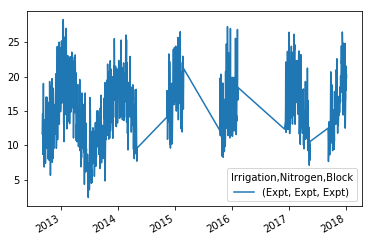

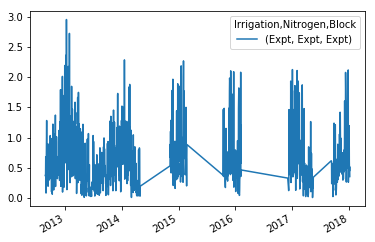

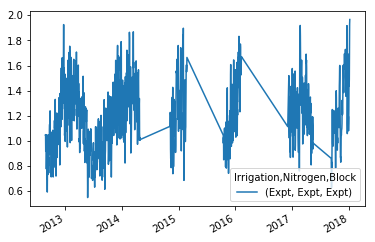

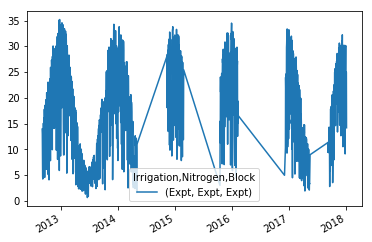

In [59]:
Ta.loc[CommonDates,:].plot()
Ed.loc[CommonDates,:].plot()
Ea.loc[CommonDates,:].plot()
Rs.loc[CommonDates,:].plot()

In [60]:
def MakeTimeSeriesGraphs(Data,name,ymin,ymax):
    Graph = plt.figure(figsize=(18,30))
    Crops = Data.columns.get_level_values(0).drop_duplicates().values
    Crops.sort()
    pos = 1
    for C in Crops:
        GP = globals()[C+'GPs']
        ax = Graph.add_subplot(3,2,pos)
        GH.AddIndexedPlot(Data.reindex(CommonDates).loc[:,C].dropna(how='all'),ax,GP,2)
        plt.ylabel(name, fontsize=36);
        plt.ylim(ymin,ymax)
        plt.tick_params(labelsize=20)
        plt.title(C, fontsize=28)
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=int(np.ceil(Data.loc[:,C].dropna(how='all').index.size/30/5))))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
        GH.AddLegend(1,16,'')
        pos+=1
def MakeSingleCropTimeSeries(Data,Crop):
    graph = plt.figure(figsize=(18,18))
    ax = graph.add_subplot(1,1,1)
    GP = globals()[Crop+'GPs']
    GH.AddIndexedPlot(Data.reindex(CommonDates).loc[:,Crop].dropna(how='all'),ax,GP,2)

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


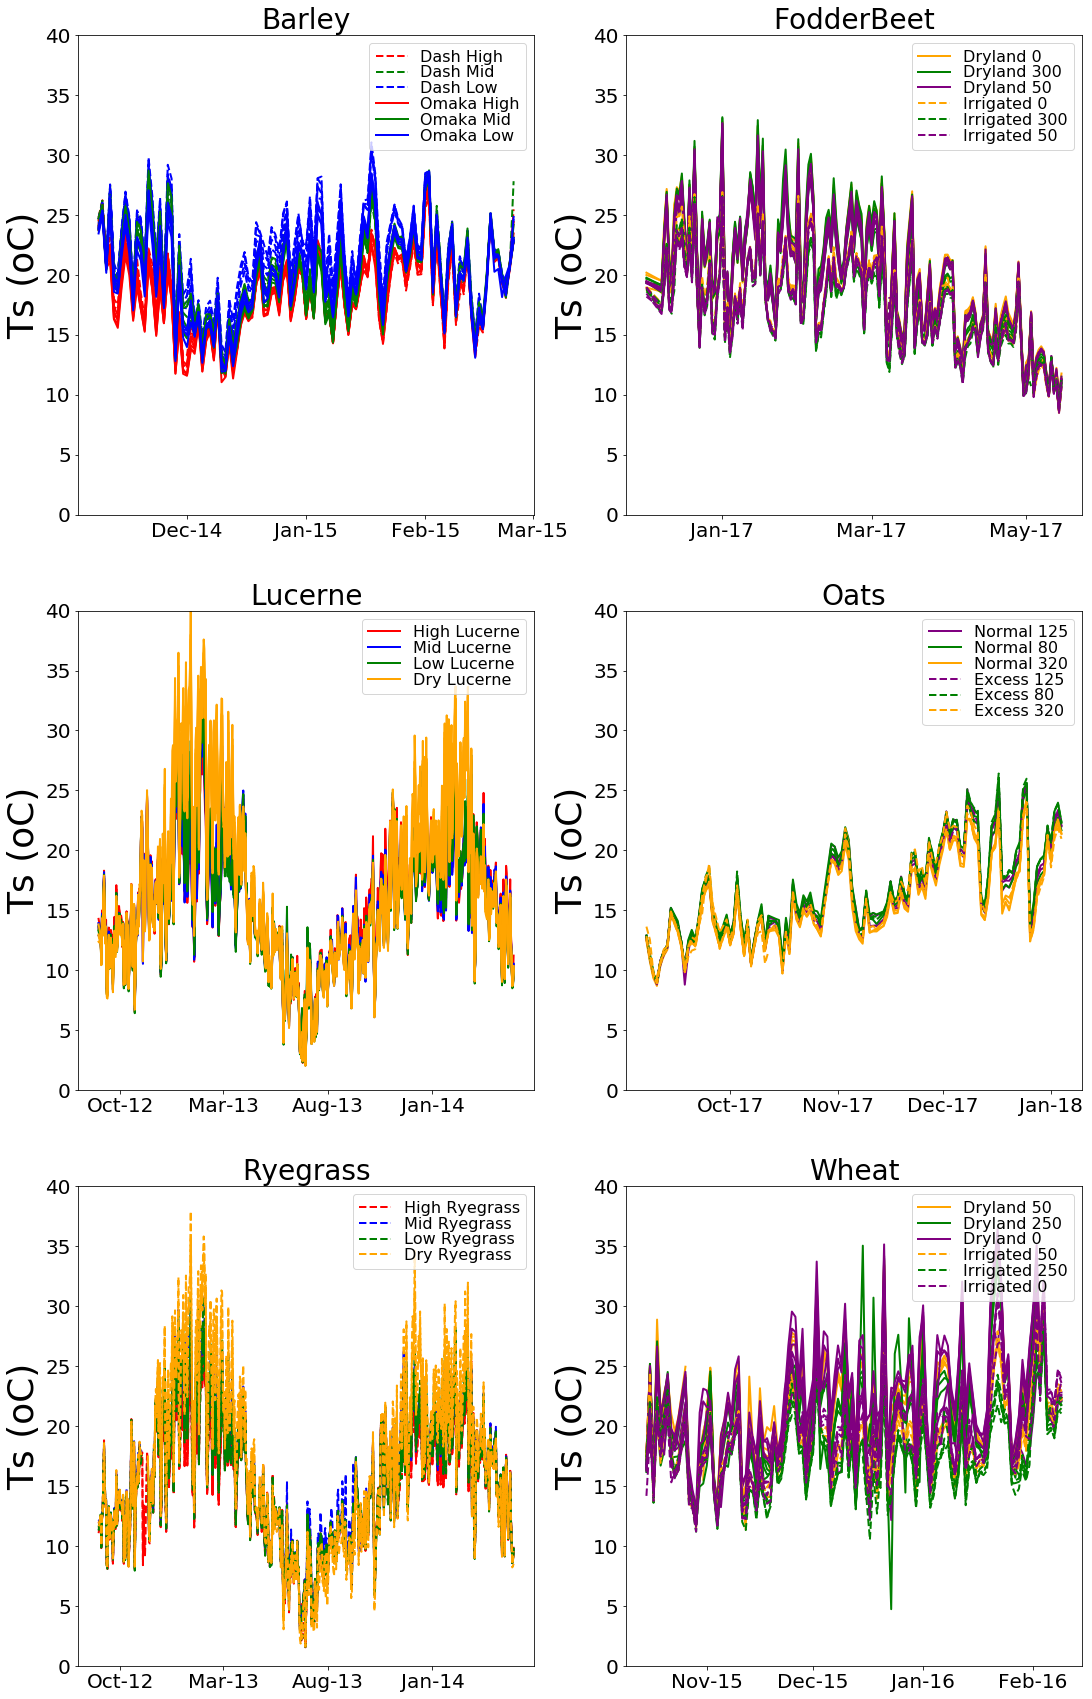

In [61]:
MakeTimeSeriesGraphs(Ts,'Ts (oC)',0,40)

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


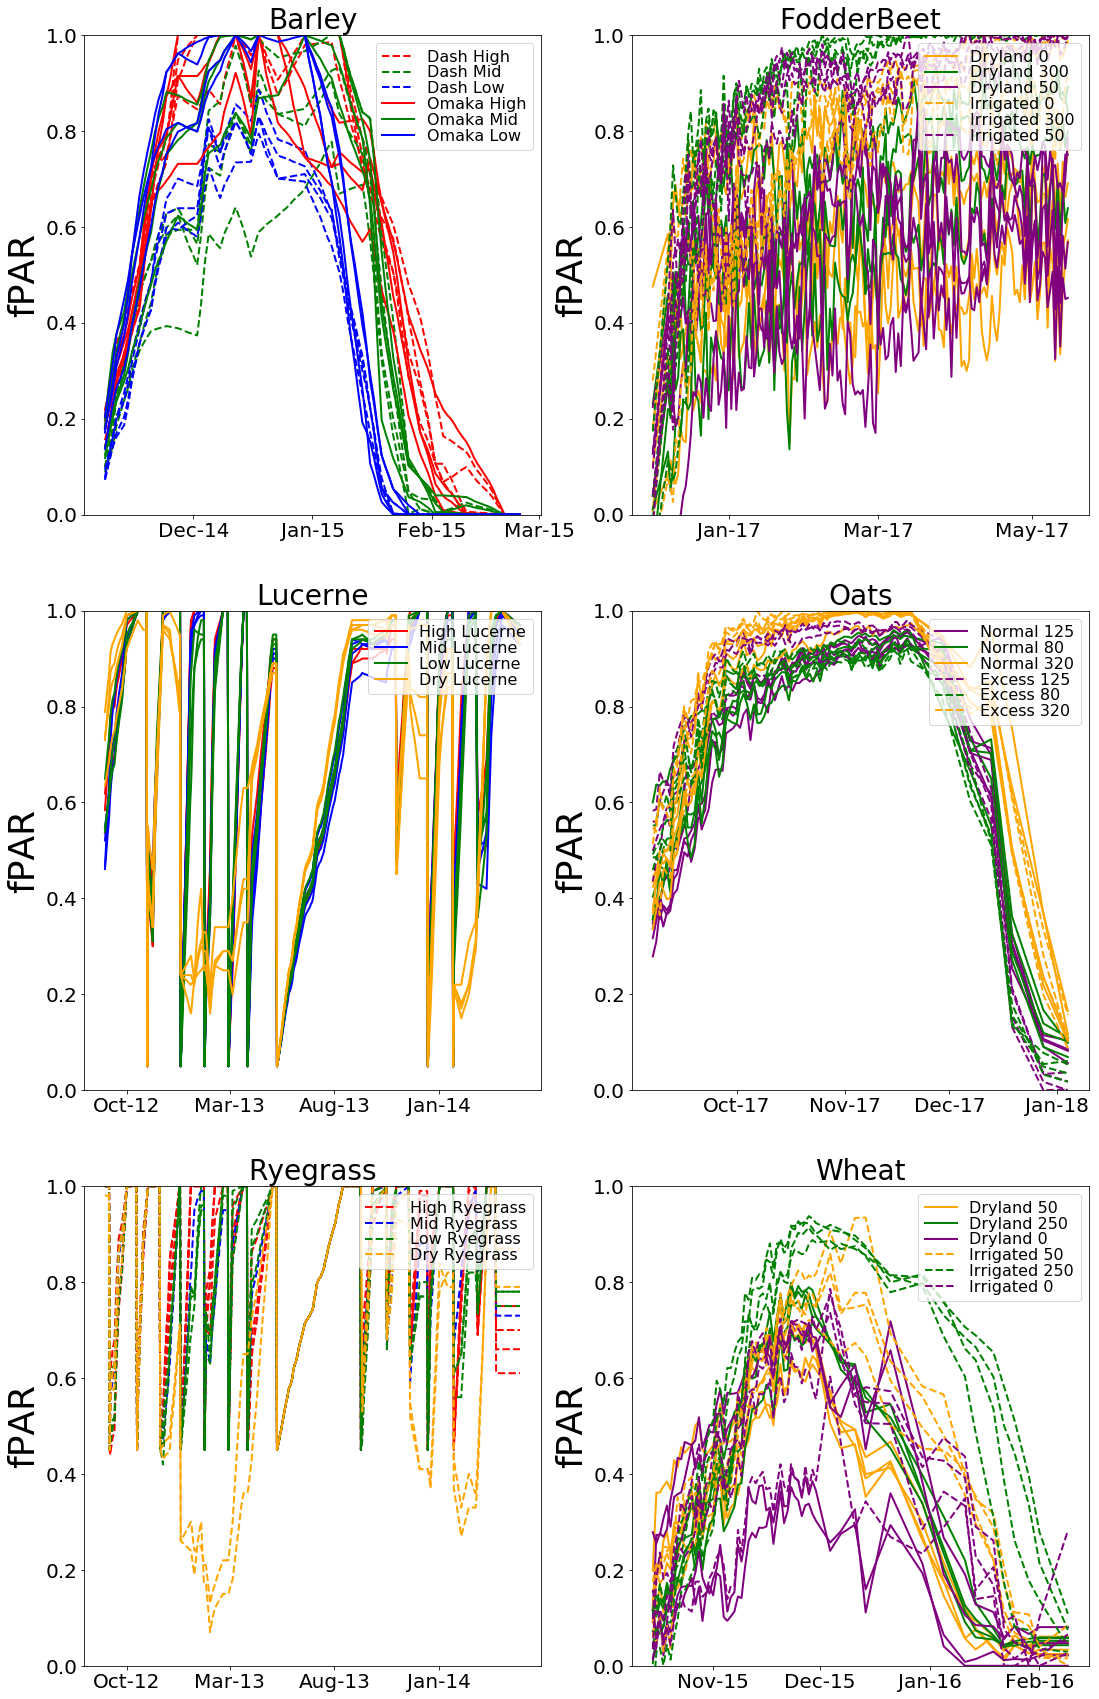

In [62]:
MakeTimeSeriesGraphs(fPAR,'fPAR',0,1)

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


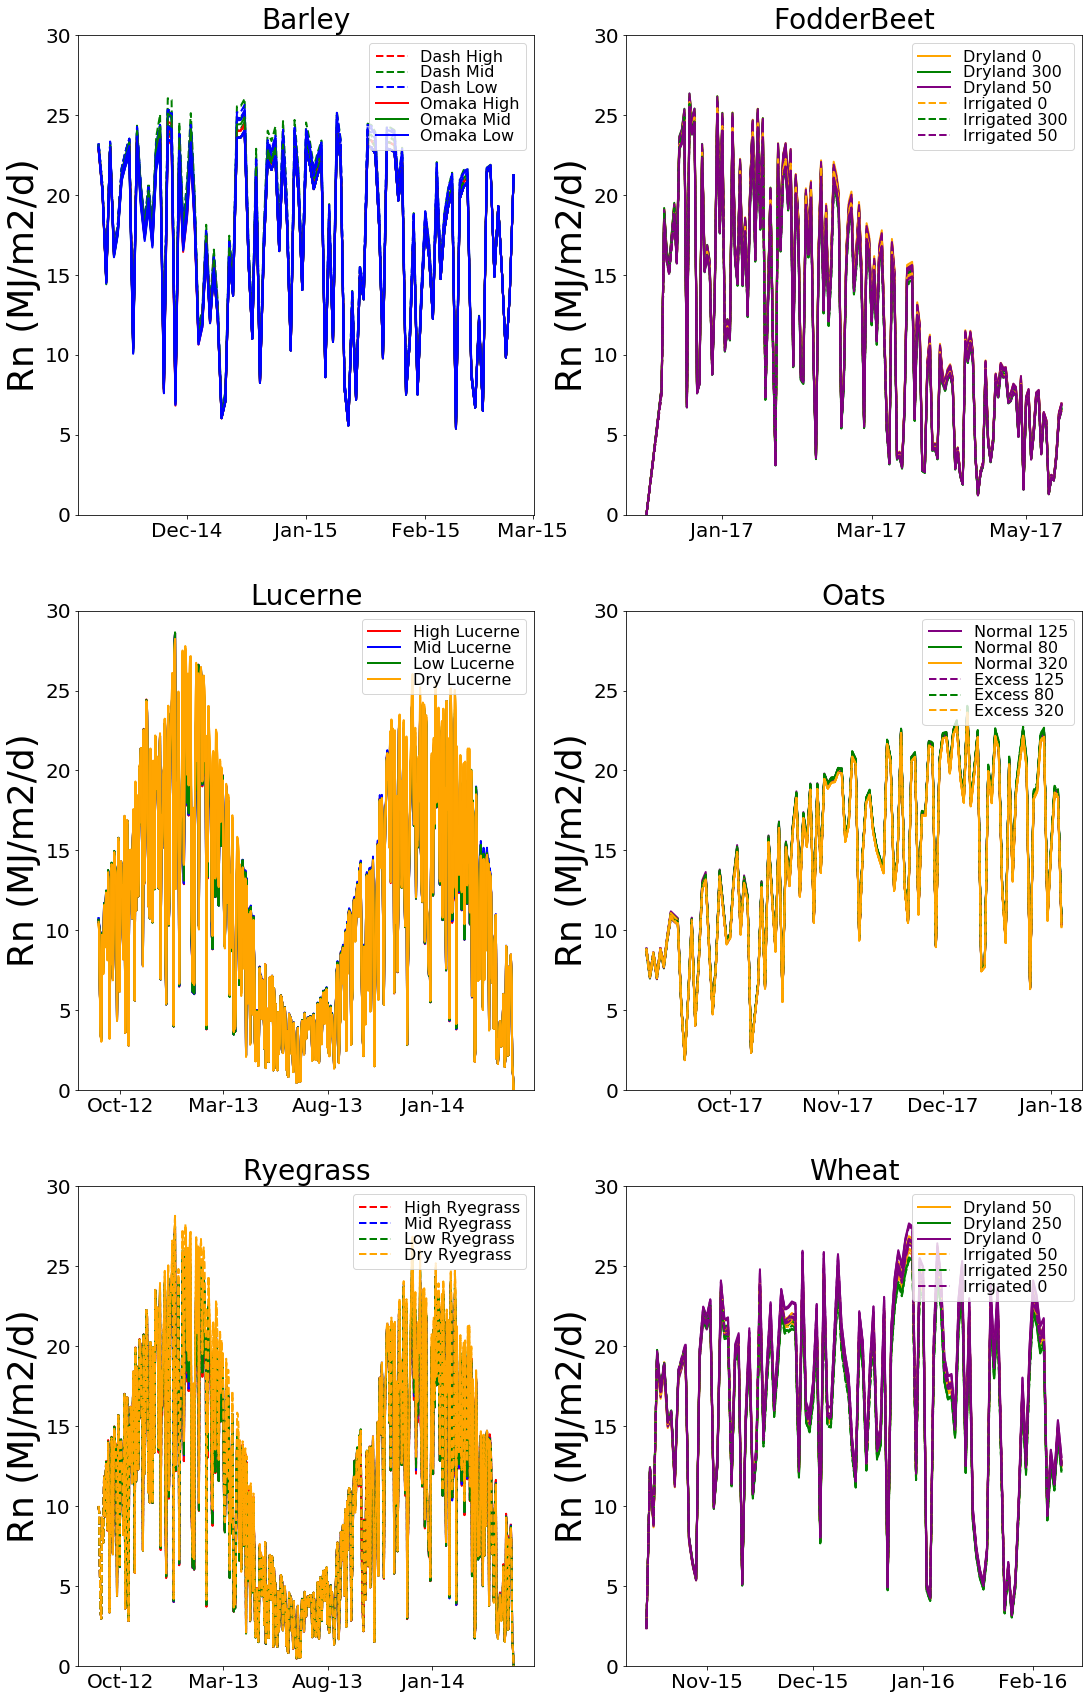

In [63]:
MakeTimeSeriesGraphs(Rn,'Rn (MJ/m2/d)',0,30)

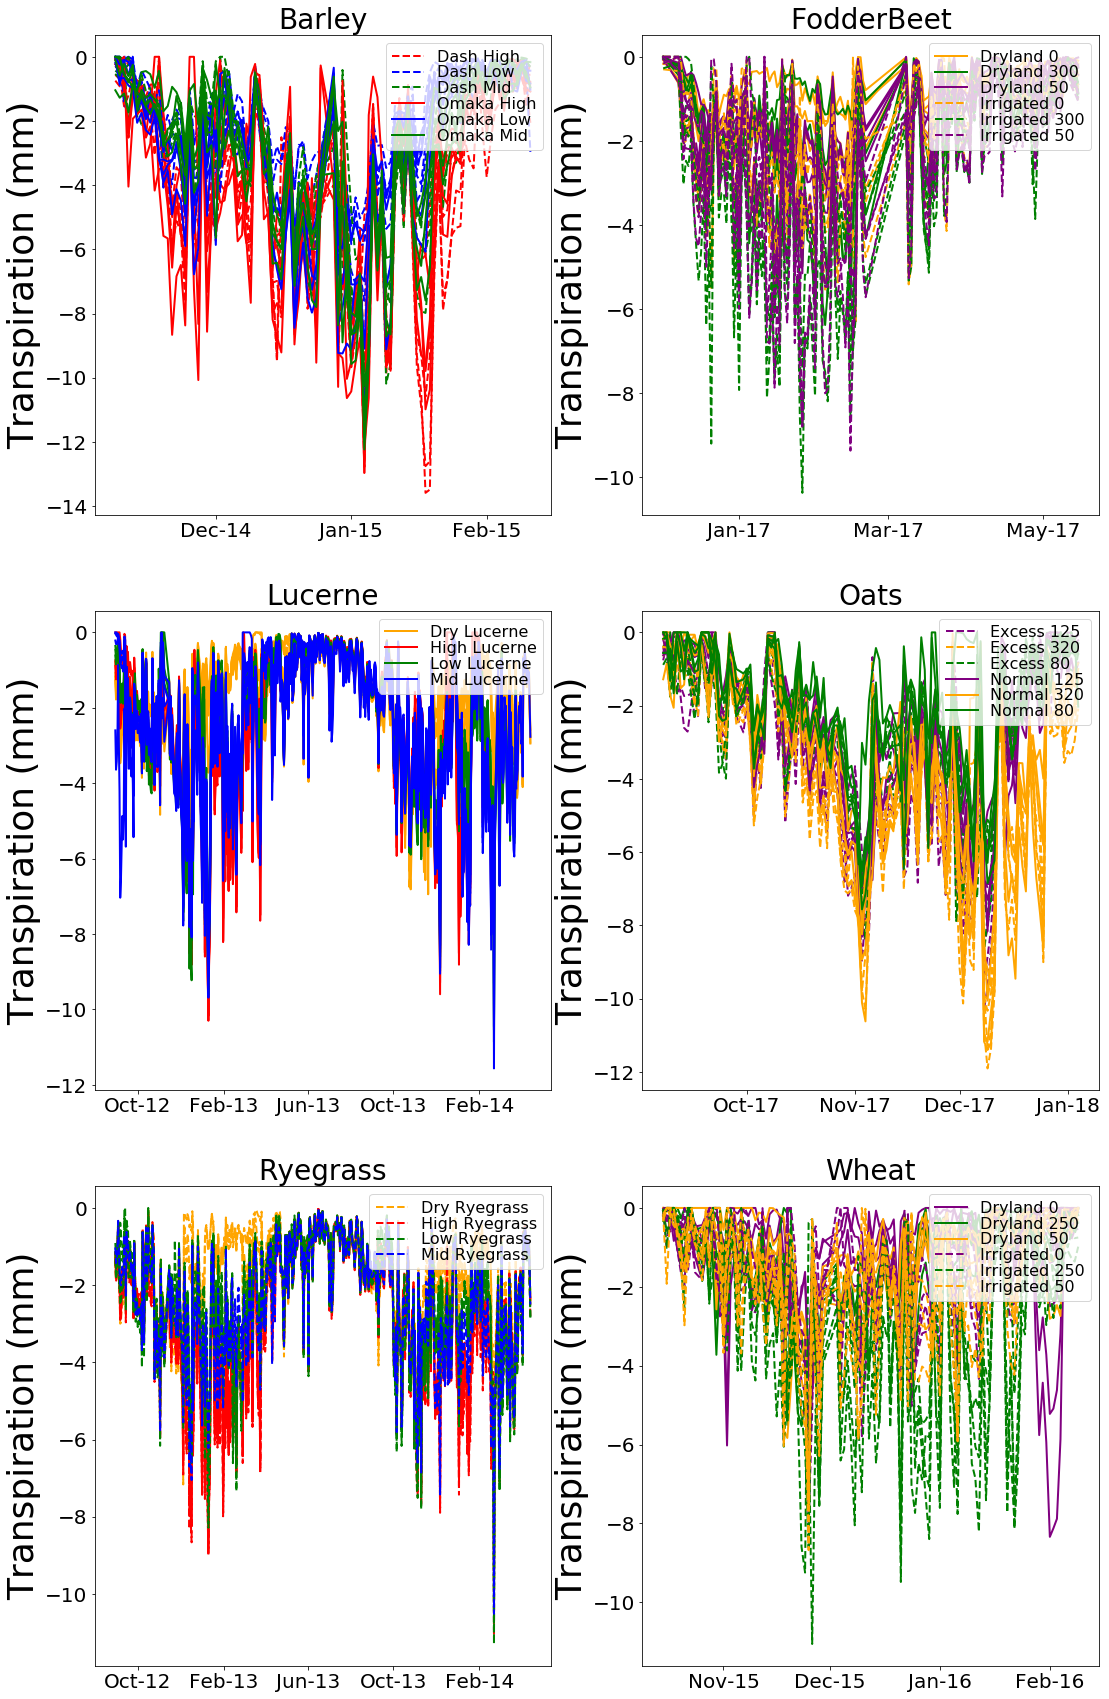

In [64]:
MakeTimeSeriesGraphs(Transpiration,'Transpiration (mm)',None,None)

In [65]:
gama = et.gama(Ta)
lamda = et.lamda(Ta)

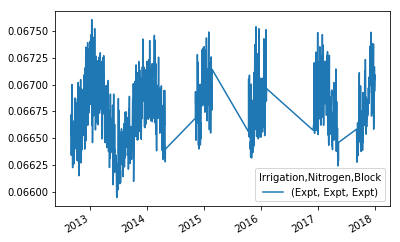

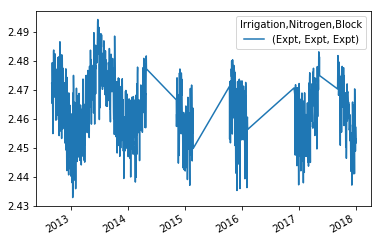

In [66]:
gama.plot()
lamda.plot()

In [67]:
#Calculate aerodynamic temperature
To = pd.DataFrame(index = CommonDates,columns=Ts.columns)
for plot in To.columns:
    To.loc[:,plot] = Ts.loc[CommonDates,plot] + Ed.loc[CommonDates,('Expt','Expt','Expt')].values
    
#Calculate temperature difference
Td = pd.DataFrame(index = CommonDates,columns=Ts.columns)
for plot in Td.columns:
    Td.loc[:,plot] = To.loc[CommonDates,plot] - Ta.loc[CommonDates,('Expt','Expt','Expt')].values
    
def estGDay(SoilRadn, AirTemp):
    Const = -0.7091
    SoilRadEff = np.multiply(SoilRadn.values,0.2149)
    AirTempEff = np.multiply(AirTemp.values,0.0736)
    return Const + SoilRadEff  + AirTempEff 

#Calculate G for each plot
G = pd.DataFrame(index=CommonDates, columns=Ts.columns)
for plot in G.columns:
    G.loc[:,plot] = estGDay(Rs.loc[CommonDates,('Expt','Expt','Expt')] * (1-fPAR.loc[CommonDates,plot]),
                            Ta.loc[CommonDates,('Expt','Expt','Expt')])
RnLessG = Rn - G

In [68]:
#Calculate lamda E for each plot
lamdaE = pd.DataFrame(index=CommonDates, columns = Transpiration.columns)
for plot in lamdaE.columns:
    lamdaE.loc[:,plot] = -1* Transpiration.loc[CommonDates,plot] * lamda.loc[CommonDates,('Expt','Expt','Expt')].values

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:979: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_nested_tuple(tup)


In [69]:
#Estimate Eo for each plot
def estEo(Ea, gama, To, Ta, lamdaE, RnLessG,wind):
    numerator = gama * (To-Ta) * lamdaE
    denominator = RnLessG - lamdaE
    if numerator/denominator > 0.2:
        Eo = Ea + numerator/denominator
    else:
        Cp = 1013
        p = et.AirDensity(Ta)
        ga = 0.1 + (0.15 * wind)
        numerator = gama * lamdaE
        denominator = ga * p * Cp
        Eo = Ea + numerator/denominator
    
    Esat = et.saturated_vapor_pressure(To)/10
    
    return min(Eo, Esat * 0.9)
    
Eo = pd.DataFrame(index=CommonDates, columns = Transpiration.columns)
for plot in Eo.columns:
    for x in CommonDates:
        Eo.loc[x,plot] = estEo(Ea.loc[x,('Expt','Expt','Expt')],
                          gama.loc[x,('Expt','Expt','Expt')],
                          To.loc[x,plot],
                          Ta.loc[x,('Expt','Expt','Expt')],
                          lamdaE.loc[x,plot],
                          RnLessG.loc[x,plot],
                          u.loc[x,('Expt','Expt','Expt')])

In [70]:
#Calculate VPD at To
DatTo = pd.DataFrame(index = CommonDates,columns=To.columns)

for plot in DatTo.columns:
    DatTo.loc[:,plot] = [et.saturated_vapor_pressure(x)/10  for x in To.loc[CommonDates,plot].values] - Eo.loc[CommonDates,plot].values

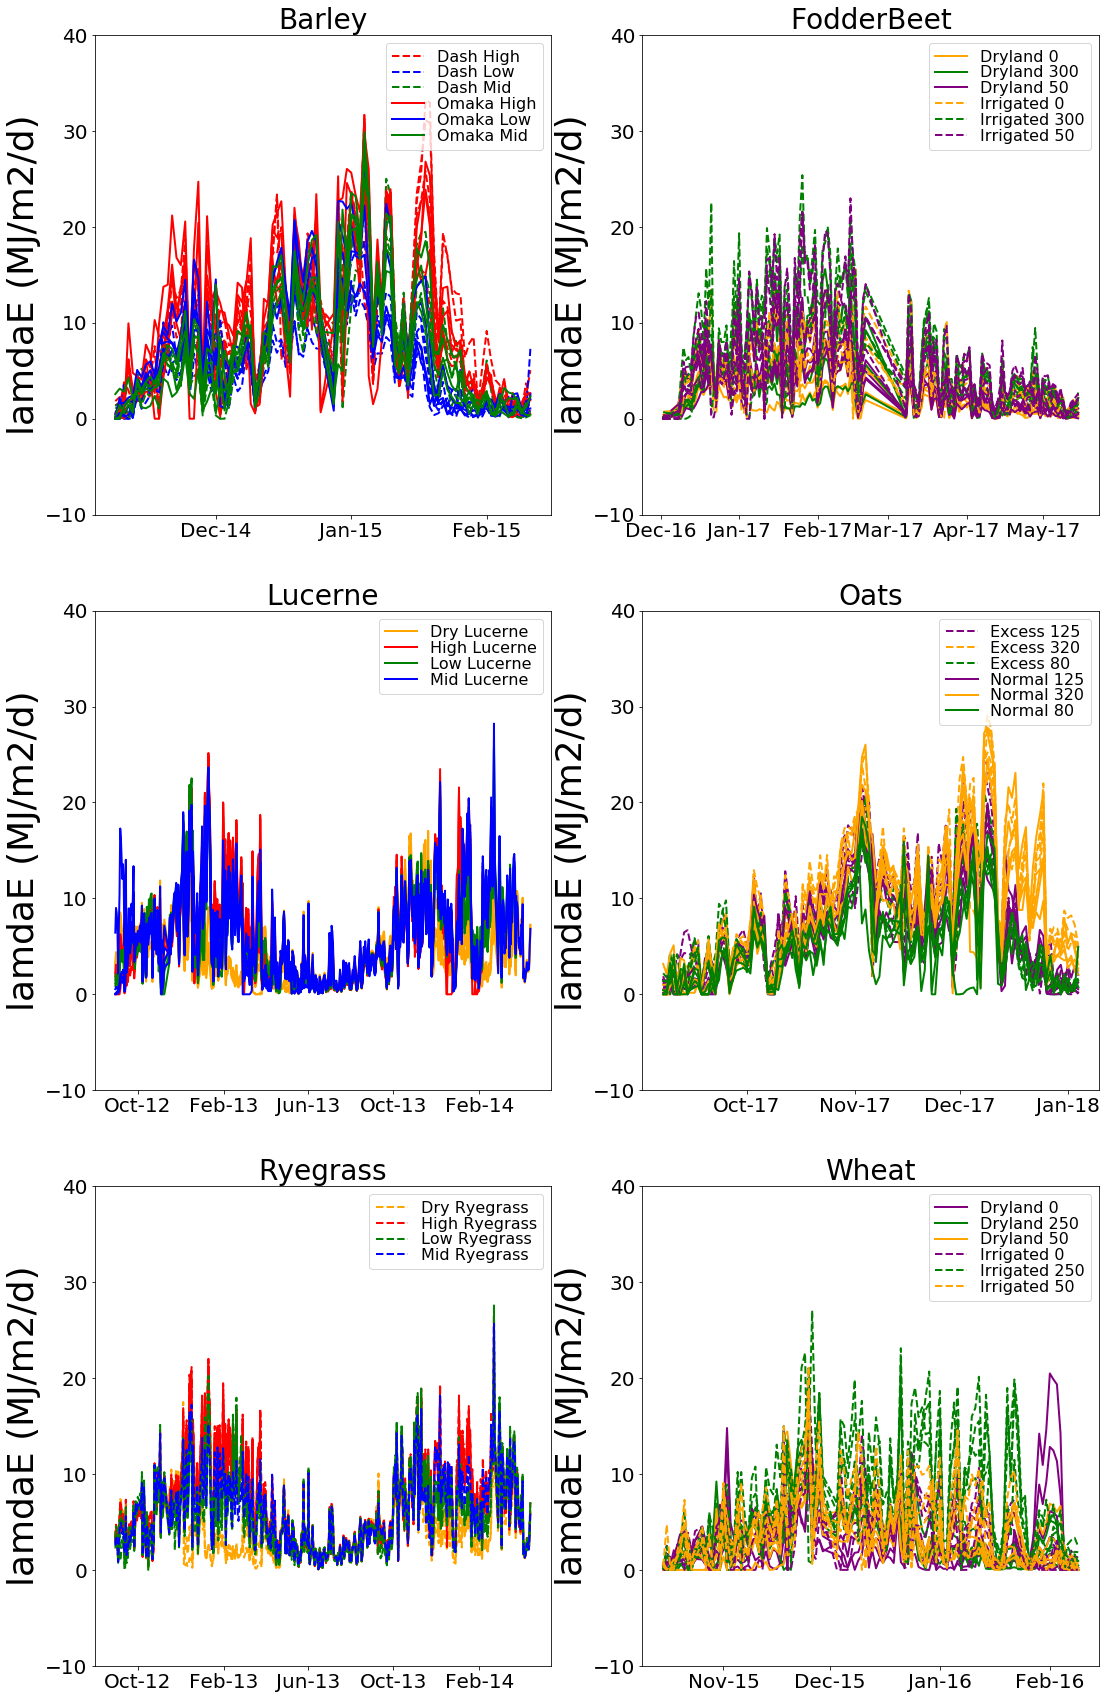

In [71]:
MakeTimeSeriesGraphs(lamdaE,'lamdaE (MJ/m2/d)',-10,40)

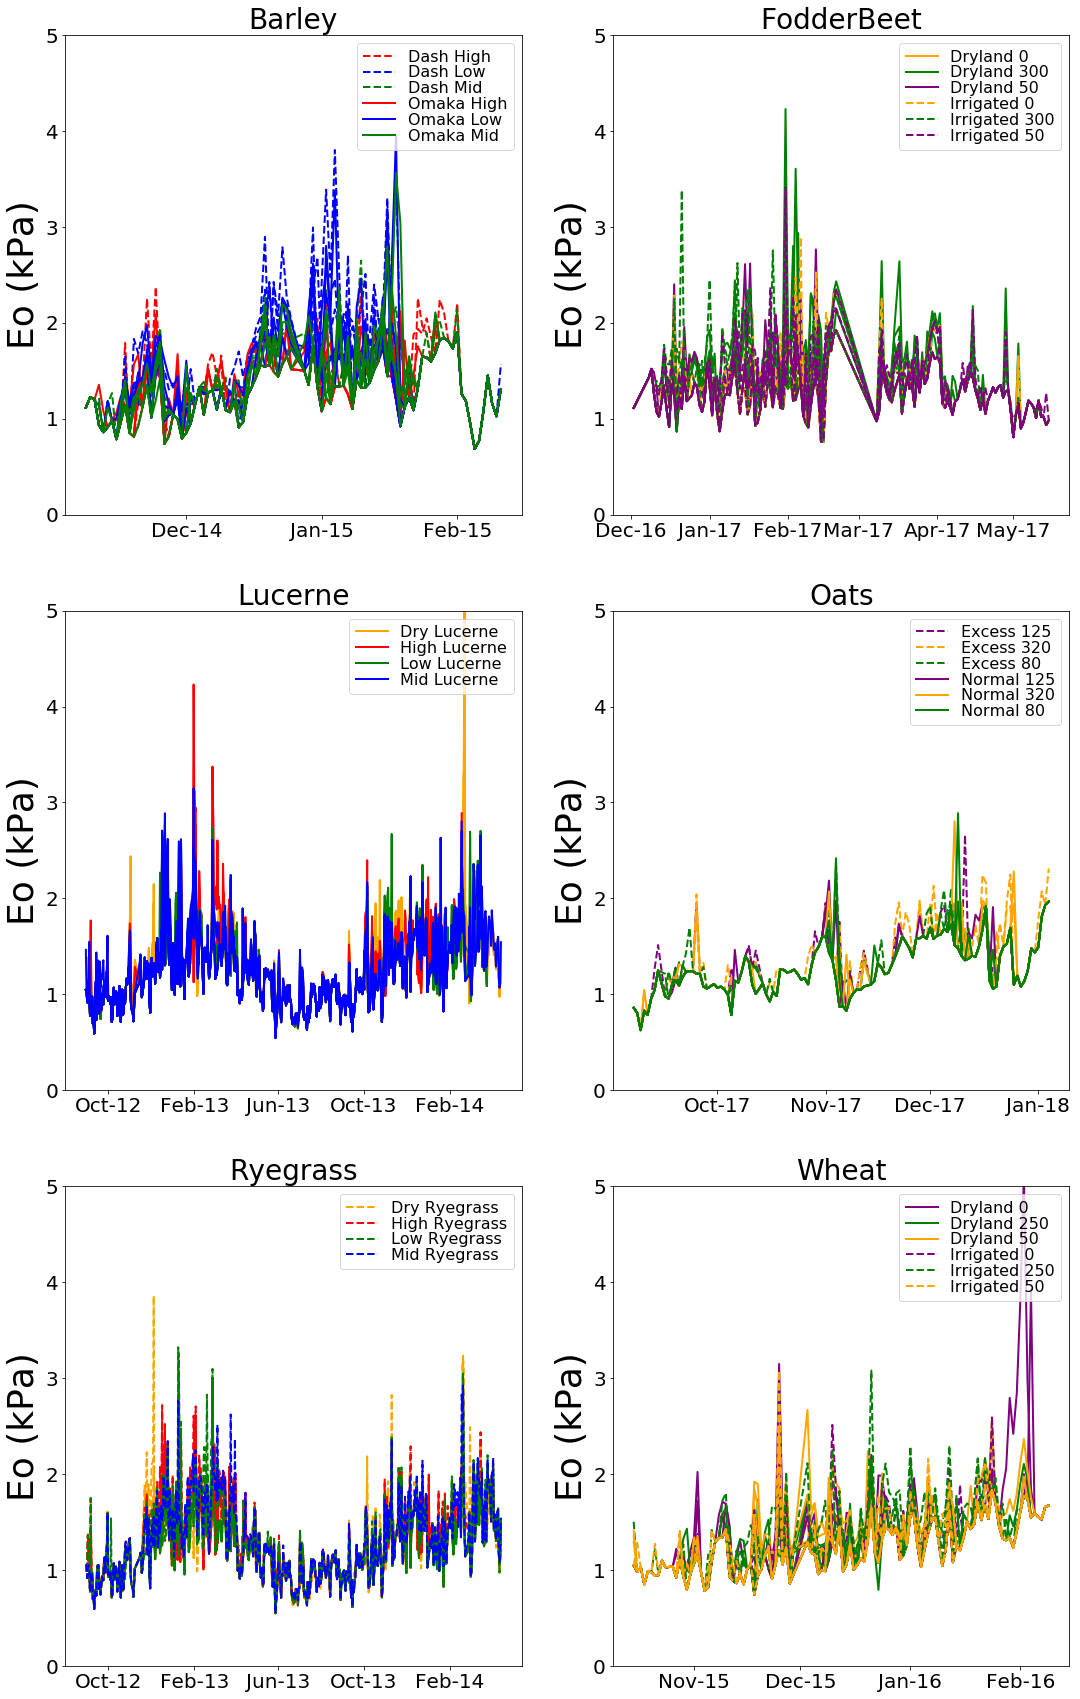

In [72]:
MakeTimeSeriesGraphs(Eo,'Eo (kPa)',0,5)

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


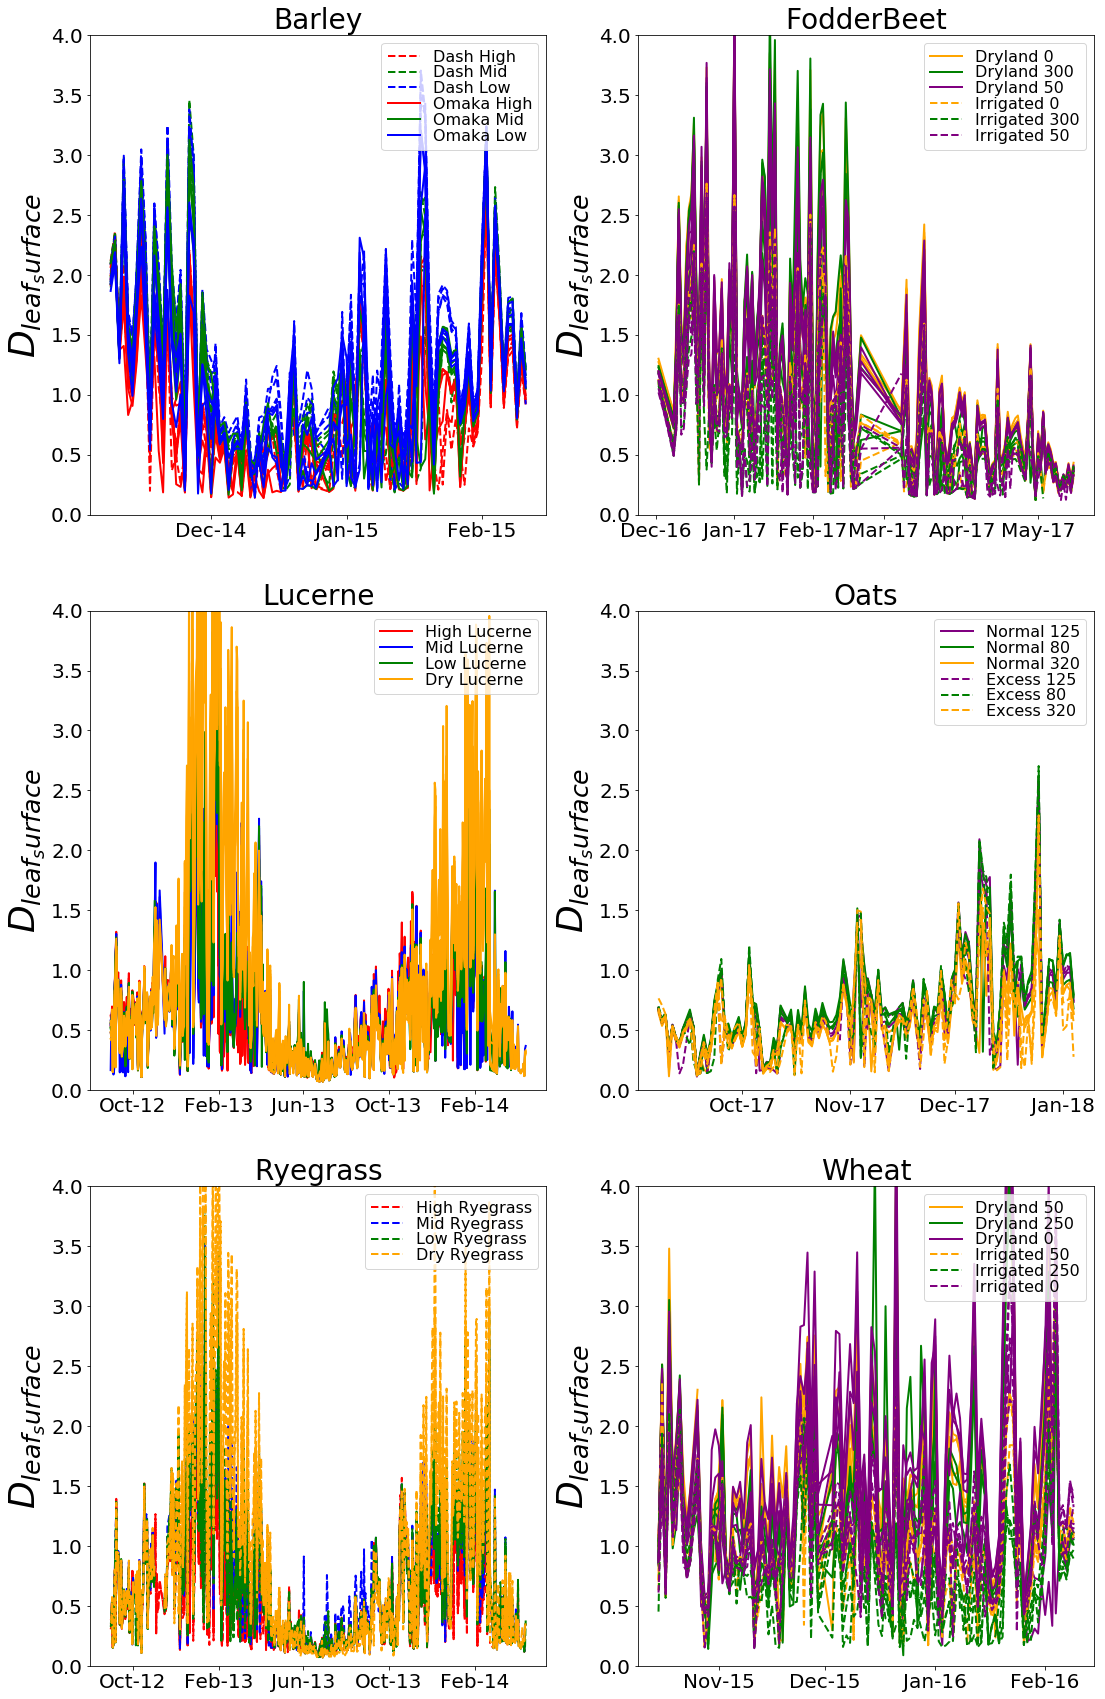

In [73]:
MakeTimeSeriesGraphs(DatTo,r'$D_{leaf_surface}$',0,4)

In [81]:
WU.Barley.dropna(how='all').cumsum().min(axis=0)*-1

Irrigation  Nitrogen  Block
Dash        High      1        391.314534
                      2        372.567383
                      3        367.561823
                      4        423.571409
            Low       1        258.874391
                      2        231.216787
                      3        184.489564
                      4        199.917063
            Mid       1        284.617661
                      2        278.601237
                      3        261.100137
                      4        343.191514
Omaka       High      1        352.139292
                      2        411.928450
                      3        362.213950
                      4        455.359749
            Low       1        270.845932
                      2        272.466827
                      3        305.512079
                      4        273.253020
            Mid       1        263.978193
                      2        318.108424
                      3        281.280190
      